In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows=150

## Import Datasets

In [3]:
listings = pd.read_csv('../Lisbon-Portugal-data/listings.csv', low_memory=False)
listings_two = pd.read_csv('../Lisbon-Portugal-data/listings-2.csv')
calendar = pd.read_csv('../Lisbon-Portugal-data/calendar.csv', low_memory=False)
neighborhoods = pd.read_csv('../Lisbon-Portugal-data/neighbourhoods.csv')
# reviews = pd.read_csv('../Lisbon-Portugal-data/reviews.csv', low_memory=False)
# reviews_two = pd.read_csv('../Lisbon-Portugal-data/reviews-2.csv', low_memory=False)

## Examine Data

In [4]:
listings.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.430200e+04,2.430200e+04,0.0,0.0,0.0,2.430200e+04,24301.000000,24301.000000,24302.000000,24302.000000,...,19886.000000,19875.000000,19880.00000,19877.000000,19875.000000,24302.000000,24302.000000,24302.000000,24302.00000,20075.000000
mean,2.257234e+07,2.020053e+13,NaN,NaN,NaN,9.490641e+07,20.291840,20.291840,38.755631,-9.202451,...,9.435030,9.641610,9.65659,9.536902,9.214340,14.835322,12.305654,2.150687,0.14970,1.385960
std,1.213037e+07,0.000000e+00,NaN,NaN,NaN,9.333440e+07,71.797202,71.797202,0.103688,0.110301,...,0.911513,0.826811,0.81353,0.758469,0.914887,42.781736,42.669665,6.479967,1.11104,1.411868
min,6.499000e+03,2.020053e+13,NaN,NaN,NaN,1.445500e+04,0.000000,0.000000,38.676080,-9.498520,...,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.010000
25%,1.348872e+07,2.020053e+13,NaN,NaN,NaN,1.521207e+07,1.000000,1.000000,38.711040,-9.218737,...,9.000000,9.000000,10.00000,9.000000,9.000000,1.000000,1.000000,0.000000,0.00000,0.290000
50%,2.298439e+07,2.020053e+13,NaN,NaN,NaN,5.937474e+07,4.000000,4.000000,38.717835,-9.146800,...,10.000000,10.000000,10.00000,10.000000,9.000000,3.000000,2.000000,0.000000,0.00000,0.890000
75%,3.279862e+07,2.020053e+13,NaN,NaN,NaN,1.610771e+08,11.000000,11.000000,38.739197,-9.134610,...,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,6.000000,1.000000,0.00000,2.100000
max,4.356874e+07,2.020053e+13,NaN,NaN,NaN,3.474345e+08,1350.000000,1350.000000,39.303670,-8.838270,...,10.000000,10.000000,10.00000,10.000000,10.000000,336.000000,336.000000,69.000000,18.00000,19.610000


In [5]:
listings.drop(['thumbnail_url', 'medium_url', 'xl_picture_url'], axis=1, inplace=True)

In [6]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.430200e+04,2.430200e+04,2.430200e+04,24301.000000,24301.000000,24302.000000,24302.000000,24302.000000,24277.000000,24290.000000,...,19886.000000,19875.000000,19880.00000,19877.000000,19875.000000,24302.000000,24302.000000,24302.000000,24302.00000,20075.000000
mean,2.257234e+07,2.020053e+13,9.490641e+07,20.291840,20.291840,38.755631,-9.202451,4.057362,1.449664,1.660189,...,9.435030,9.641610,9.65659,9.536902,9.214340,14.835322,12.305654,2.150687,0.14970,1.385960
std,1.213037e+07,0.000000e+00,9.333440e+07,71.797202,71.797202,0.103688,0.110301,2.421068,0.920968,1.194550,...,0.911513,0.826811,0.81353,0.758469,0.914887,42.781736,42.669665,6.479967,1.11104,1.411868
min,6.499000e+03,2.020053e+13,1.445500e+04,0.000000,0.000000,38.676080,-9.498520,1.000000,0.000000,0.000000,...,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.010000
25%,1.348872e+07,2.020053e+13,1.521207e+07,1.000000,1.000000,38.711040,-9.218737,2.000000,1.000000,1.000000,...,9.000000,9.000000,10.00000,9.000000,9.000000,1.000000,1.000000,0.000000,0.00000,0.290000
50%,2.298439e+07,2.020053e+13,5.937474e+07,4.000000,4.000000,38.717835,-9.146800,4.000000,1.000000,1.000000,...,10.000000,10.000000,10.00000,10.000000,9.000000,3.000000,2.000000,0.000000,0.00000,0.890000
75%,3.279862e+07,2.020053e+13,1.610771e+08,11.000000,11.000000,38.739197,-9.134610,5.000000,2.000000,2.000000,...,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,6.000000,1.000000,0.00000,2.100000
max,4.356874e+07,2.020053e+13,3.474345e+08,1350.000000,1350.000000,39.303670,-8.838270,32.000000,24.000000,25.000000,...,10.000000,10.000000,10.00000,10.000000,10.000000,336.000000,336.000000,69.000000,18.00000,19.610000


In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24302 entries, 0 to 24301
Columns: 103 entries, id to reviews_per_month
dtypes: float64(18), int64(21), object(64)
memory usage: 19.1+ MB


In [8]:
listings.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24302 entries, 0 to 24301
Data columns (total 103 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   id                                            int64  
 1   listing_url                                   object 
 2   scrape_id                                     int64  
 3   last_scraped                                  object 
 4   name                                          object 
 5   summary                                       object 
 6   space                                         object 
 7   description                                   object 
 8   experiences_offered                           object 
 9   neighborhood_overview                         object 
 10  notes                                         object 
 11  transit                                       object 
 12  access                                        object 
 13  

In [9]:
listings['has_availability']
# if its booked can assume to show minimum if it has avail == f then booked

0        t
1        t
2        t
3        t
4        t
        ..
24297    t
24298    t
24299    t
24300    t
24301    t
Name: has_availability, Length: 24302, dtype: object

In [10]:
listings_two.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24302 entries, 0 to 24301
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              24302 non-null  int64  
 1   name                            24283 non-null  object 
 2   host_id                         24302 non-null  int64  
 3   host_name                       24301 non-null  object 
 4   neighbourhood_group             24302 non-null  object 
 5   neighbourhood                   24302 non-null  object 
 6   latitude                        24302 non-null  float64
 7   longitude                       24302 non-null  float64
 8   room_type                       24302 non-null  object 
 9   price                           24302 non-null  int64  
 10  minimum_nights                  24302 non-null  int64  
 11  number_of_reviews               24302 non-null  int64  
 12  last_review                     

In [11]:
listings_two.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.430200e+04,2.430200e+04,24302.000000,24302.000000,24302.000000,24302.000000,24302.000000,20075.000000,24302.000000,24302.000000
mean,2.257234e+07,9.490641e+07,38.755631,-9.202451,111.541848,3.391367,41.446054,1.385960,14.835322,223.512880
std,1.213037e+07,9.333440e+07,0.103688,0.110301,351.691298,16.272085,65.824770,1.411868,42.781736,135.147466
min,6.499000e+03,1.445500e+04,38.676080,-9.498520,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.348872e+07,1.521207e+07,38.711040,-9.218737,47.000000,1.000000,2.000000,0.290000,1.000000,97.000000
50%,2.298439e+07,5.937474e+07,38.717835,-9.146800,70.000000,2.000000,13.000000,0.890000,3.000000,269.000000
75%,3.279862e+07,1.610771e+08,38.739197,-9.134610,100.000000,3.000000,53.000000,2.100000,10.000000,351.000000
max,4.356874e+07,3.474345e+08,39.303670,-8.838270,10000.000000,1000.000000,877.000000,19.610000,336.000000,365.000000


In [12]:
listings.count()

id                                              24302
listing_url                                     24302
scrape_id                                       24302
last_scraped                                    24302
name                                            24283
summary                                         23382
space                                           19104
description                                     23980
experiences_offered                             24302
neighborhood_overview                           16602
notes                                           12599
transit                                         16325
access                                          13340
interaction                                     14543
house_rules                                     14160
picture_url                                     24302
host_id                                         24302
host_url                                        24302
host_name                   

In [13]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=103)

## check nulls

In [14]:
# listings.isna()
# listings.isnull().sum()
# listings.isnull().values.any()
# listings.isnull().sum().sum()

In [15]:
# mask = listings.notna()
# listings[mask]

In [16]:
listings.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6499,https://www.airbnb.com/rooms/6499,20200528045718,2020-06-06,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...",Fully furnished apartment (35m2). Small inside...,"This apartment is all about Location, next to ...",none,"To get to the city center, tram 15 stops in f...",...,t,f,moderate,f,f,1,1,0,0,0.37
1,25659,https://www.airbnb.com/rooms/25659,20200528045718,2020-05-28,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Sunny 1 Bedroom cozy apartment in historic Alf...,"Charming, sunny, cozy apartment in the heart o...",Sunny 1 Bedroom cozy apartment in historic Alf...,none,Alfama is the oldest and most picturesque quar...,...,t,f,moderate,f,f,1,1,0,0,1.52
2,29248,https://www.airbnb.com/rooms/29248,20200528045718,2020-05-29,Apartamento Alfama com vista para o rio!,NaN,"Located in the city center, and great location...","Located in the city center, and great location...",none,NaN,...,t,f,flexible,f,f,1,1,0,0,2.80
3,29396,https://www.airbnb.com/rooms/29396,20200528045718,2020-05-28,Alfama Hill - Boutique apartment,Feel at home in the historic centre of Lisbon.,"Charming apartment renovated in 2017, on the g...",Feel at home in the historic centre of Lisbon....,none,Great neighborhood in the old part of town. Am...,...,t,f,flexible,f,t,2,2,0,0,2.45
4,29720,https://www.airbnb.com/rooms/29720,20200528045718,2020-06-06,TheHOUSE - Your luxury home,"A house at the top of an anonimous building, T...","The size, the decoration and, especially, our ...","A house at the top of an anonimous building, T...",none,"Location in the city's Embassies area, near en...",...,f,f,strict_14_with_grace_period,f,t,2,2,0,0,0.48
5,29915,https://www.airbnb.com/rooms/29915,20200528045718,2020-06-05,Modern and Cool Apartment in Lisboa,A modern and equipped apartment. Quiet and pea...,"Large 1 bedroom apartment, in a just built mod...",A modern and equipped apartment. Quiet and pea...,none,"Location: Entrecampos, Avenida das Forças Arma...",...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.31
6,33348,https://www.airbnb.com/rooms/33348,20200528045718,2020-06-05,Happy Season,NaN,"Five minutes by foot to subway Campo Grande, y...","Five minutes by foot to subway Campo Grande, y...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,0.02
7,40817,https://www.airbnb.com/rooms/40817,20200528045718,2020-06-05,"Chiado, Alecrim walk to Riverfront","Lockdown in Lisbon is over! All is ready, in...","This is a large suite is in the 3rd floor, wit...","Lockdown in Lisbon is over! All is ready, in...",none,"Located a few steps away, (5 mn walk), from th...",...,t,f,flexible,f,f,15,15,0,0,3.14
8,42519,https://www.airbnb.com/rooms/42519,20200528045718,2020-06-05,Nice Apart.BAIRRO ALTO (ADAMASTOR) 6-1º,This apartment is the best choice for those wh...,This apartment offers you a living room to res...,This apartment is the best choice for those wh...,none,This apartment is the ideal choice for those w...,...,t,f,flexible,f,f,10,10,0,0,1.08
9,48025,https://www.airbnb.com/rooms/48025,20200528045718,2020-05-28,Apartment for renting in Lisbon,NaN,Located in the heart of old Lisbon (Bairro Alt...,Located in the heart of old Lisbon (Bairro Alt...,none,NaN,...,f,f,flexible,f,f,5,5,0,0,0.16


In [17]:
listings_two.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24292,43556742,Modern and Comfortable Apartment River View,15225525,Ines,Lisboa,Misericrdia,38.70877,-9.14820,Entire home/apt,54,2,0,NaN,NaN,1,159
24293,43557705,Single bedrom with TV,50679081,Manuel,Lisboa,So Vicente,38.72217,-9.13132,Private room,25,60,0,NaN,NaN,6,153
24294,43562836,2 bedroom duplex Rossio - Wifi,327776633,Maria,Lisboa,Arroios,38.71667,-9.13785,Entire home/apt,71,2,0,NaN,NaN,3,355
24295,43563610,Light House BA,258617902,Susana,Lisboa,Misericrdia,38.71302,-9.14651,Entire home/apt,50,3,0,NaN,NaN,2,169
24296,43563882,New! MY LX FLAT Luxury Chiado Design Apartment,17125483,Patrícia,Lisboa,Misericrdia,38.70860,-9.14335,Entire home/apt,120,1,1,2020-05-30,1.0,25,351
24297,43563899,Room with privat w.c. river view on City center,3849818,Linda,Lisboa,Misericrdia,38.71008,-9.14669,Private room,35,3,0,NaN,NaN,1,96
24298,43563972,Ericeira Paradise Hostel&Suites,344546018,Ericeira Paradise,Mafra,Ericeira,38.97436,-9.41751,Entire home/apt,350,4,0,NaN,NaN,1,363
24299,43566725,Volkswagen Grand California - Mr.Vancamper,233442821,David,Lisboa,Olivais,38.76655,-9.12835,Entire home/apt,94,4,0,NaN,NaN,3,359
24300,43568507,"Confortável Autocaravana 6 lugares, enjoy Port...",13224750,Jorge Eduardo Andrade Da,Sintra,Rio de Mouro,38.79098,-9.32863,Entire home/apt,60,1,0,NaN,NaN,2,356
24301,43568745,Quinta das Murtas - Quarto triplo 1 casal 1 si...,7584438,Quinta Das Murtas,Sintra,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",38.79442,-9.38440,Private room,200,1,0,NaN,NaN,3,365


In [18]:
listings_two.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,26,2020-01-03,0.37,1,340
1,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,113,2019-12-08,1.52,1,321
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,1,321,2020-03-11,2.80,1,350
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71239,-9.12887,Entire home/apt,60,2,239,2020-03-15,2.45,2,296
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71195,-9.15877,Entire home/apt,1100,2,55,2020-03-15,0.48,2,322
5,29915,Modern and Cool Apartment in Lisboa,128890,Sara,Lisboa,Avenidas Novas,38.74712,-9.15286,Entire home/apt,45,5,37,2020-01-21,0.31,1,212
6,33348,Happy Season,144484,Bruno,Lisboa,Lumiar,38.76381,-9.15256,Private room,40,1,2,2011-07-22,0.02,2,0
7,40817,"Chiado, Alecrim walk to Riverfront",176410,S.,Lisboa,Misericrdia,38.70898,-9.14312,Entire home/apt,70,1,360,2020-01-27,3.14,15,364
8,42519,Nice Apart.BAIRRO ALTO (ADAMASTOR) 6-1º,136230,David,Lisboa,Misericrdia,38.71082,-9.15090,Entire home/apt,50,1,114,2020-03-08,1.08,10,362
9,48025,Apartment for renting in Lisbon,218778,José,Lisboa,Misericrdia,38.71309,-9.14392,Entire home/apt,65,5,17,2019-12-03,0.16,5,341


In [19]:
# df = listings.merge(listings_two, on='id')
# df

In [20]:
# df.drop(['listing_url','scrape_id','last_scraped'], axis=1, inplace=True)

In [21]:
# df.head(10)

In [22]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8870230 entries, 0 to 8870229
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 473.7+ MB


In [23]:
calendar.date = pd.to_datetime(calendar.date)
## cast to datetime or int

In [24]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,117979,2020-06-06,t,$120.00,$120.00,1.0,730.0
1,6499,2020-06-06,f,$79.00,$79.00,3.0,365.0
2,6499,2020-06-07,f,$79.00,$79.00,3.0,365.0
3,6499,2020-06-08,f,$79.00,$79.00,3.0,365.0
4,6499,2020-06-09,f,$79.00,$79.00,3.0,365.0


In [25]:
calendar.describe()

,listing_id,minimum_nights,maximum_nights
count,8.870230e+06,8.869861e+06,8.869861e+06
mean,2.257234e+07,3.664800e+00,8.944841e+05
std,1.213012e+07,1.597480e+01,4.301646e+07
min,6.499000e+03,1.000000e+00,1.000000e+00
25%,1.348852e+07,1.000000e+00,3.600000e+02
50%,2.298439e+07,2.000000e+00,1.125000e+03
75%,3.279901e+07,3.000000e+00,1.125000e+03
max,4.356874e+07,3.180000e+03,2.147484e+09


In [26]:
calendar['date'].max()
calendar['date'].min()
# can use these dates to calculate income, price * minimum nights where booked (available == f)
# where available is false = its booked
# check last update for dataset, find last update compare with already booked vs reservation
# get already booked from listings df

Timestamp('2020-05-28 00:00:00')

# 3,338,149 listings booked * (price * minimum nights)
### - set price as int? to multiply
### - price * 365 days? for max income?

In [27]:
# calendar[calendar['available']=='f'].agg(np.sum)['available']
# calendar.loc[calendar['available']=='t'].count()
# calendar.loc[calendar['available']=='f'].count()
calendar.groupby(['available']).count()[['listing_id']].reset_index()

,available,listing_id
0,f,3338149
1,t,5532081


In [28]:
calendar['minimum_nights']
# calendar['maximum_nights']

0          1.0
1          3.0
2          3.0
3          3.0
4          3.0
          ... 
8870225    3.0
8870226    3.0
8870227    3.0
8870228    3.0
8870229    3.0
Name: minimum_nights, Length: 8870230, dtype: float64

# merge listings and calendar?

In [29]:
listings_two.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.430200e+04,2.430200e+04,24302.000000,24302.000000,24302.000000,24302.000000,24302.000000,20075.000000,24302.000000,24302.000000
mean,2.257234e+07,9.490641e+07,38.755631,-9.202451,111.541848,3.391367,41.446054,1.385960,14.835322,223.512880
std,1.213037e+07,9.333440e+07,0.103688,0.110301,351.691298,16.272085,65.824770,1.411868,42.781736,135.147466
min,6.499000e+03,1.445500e+04,38.676080,-9.498520,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.348872e+07,1.521207e+07,38.711040,-9.218737,47.000000,1.000000,2.000000,0.290000,1.000000,97.000000
50%,2.298439e+07,5.937474e+07,38.717835,-9.146800,70.000000,2.000000,13.000000,0.890000,3.000000,269.000000
75%,3.279862e+07,1.610771e+08,38.739197,-9.134610,100.000000,3.000000,53.000000,2.100000,10.000000,351.000000
max,4.356874e+07,3.474345e+08,39.303670,-8.838270,10000.000000,1000.000000,877.000000,19.610000,336.000000,365.000000


In [30]:
listings_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24302 entries, 0 to 24301
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              24302 non-null  int64  
 1   name                            24283 non-null  object 
 2   host_id                         24302 non-null  int64  
 3   host_name                       24301 non-null  object 
 4   neighbourhood_group             24302 non-null  object 
 5   neighbourhood                   24302 non-null  object 
 6   latitude                        24302 non-null  float64
 7   longitude                       24302 non-null  float64
 8   room_type                       24302 non-null  object 
 9   price                           24302 non-null  int64  
 10  minimum_nights                  24302 non-null  int64  
 11  number_of_reviews               24302 non-null  int64  
 12  last_review                     

In [31]:
listings_two.last_review = pd.to_datetime(listings_two.last_review)
listings_two['last_review'].min()
listings_two['last_review'].max()
# check listings from 06-05-2019 to 06-05-2020 these are real booked: price * minimum nights
#compare against reserved from calendar: price * minimum nights

Timestamp('2020-06-05 00:00:00')

# dates and increase in occupancy rate

In [32]:
mask = (listings_two['last_review'] > '2019-6-5') & (listings_two['last_review'] <= '2020-6-5')
listings_two[mask]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,26,2020-01-03,0.37,1,340
1,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,113,2019-12-08,1.52,1,321
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,1,321,2020-03-11,2.80,1,350
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71239,-9.12887,Entire home/apt,60,2,239,2020-03-15,2.45,2,296
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71195,-9.15877,Entire home/apt,1100,2,55,2020-03-15,0.48,2,322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24169,43355588,Quarto com Cama King Size,134533163,André,Lisboa,Beato,38.73448,-9.11330,Private room,25,1,1,2020-05-20,1.00,2,270
24200,43408245,CB LISBOA - SUNNY AND ELEGANT APARTMENT - LAPA V,318343650,Casa Boma,Lisboa,Estrela,38.71005,-9.15838,Entire home/apt,119,1,1,2020-05-25,1.00,9,309
24203,43409525,Sintra - Escape to Nature 1,7555035,Ana,Sintra,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",38.80154,-9.39237,Private room,50,1,1,2020-05-24,1.00,5,340
24205,43410578,Sintra - Escape to Nature 5,7555035,Ana,Sintra,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",38.80035,-9.39256,Private room,50,1,2,2020-05-21,2.00,5,301


In [63]:
prev_yr = (listings_two['last_review'] > '2019-6-5') & (listings_two['last_review'] <= '2020-6-5')
listings_two[prev_yr]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,26,2020-01-03,0.37,1,340
1,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,113,2019-12-08,1.52,1,321
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,1,321,2020-03-11,2.80,1,350
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71239,-9.12887,Entire home/apt,60,2,239,2020-03-15,2.45,2,296
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71195,-9.15877,Entire home/apt,1100,2,55,2020-03-15,0.48,2,322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24169,43355588,Quarto com Cama King Size,134533163,André,Lisboa,Beato,38.73448,-9.11330,Private room,25,1,1,2020-05-20,1.00,2,270
24200,43408245,CB LISBOA - SUNNY AND ELEGANT APARTMENT - LAPA V,318343650,Casa Boma,Lisboa,Estrela,38.71005,-9.15838,Entire home/apt,119,1,1,2020-05-25,1.00,9,309
24203,43409525,Sintra - Escape to Nature 1,7555035,Ana,Sintra,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",38.80154,-9.39237,Private room,50,1,1,2020-05-24,1.00,5,340
24205,43410578,Sintra - Escape to Nature 5,7555035,Ana,Sintra,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",38.80035,-9.39256,Private room,50,1,2,2020-05-21,2.00,5,301


In [64]:
type(listings_two[prev_yr])

pandas.core.frame.DataFrame

## drop row below

In [70]:
listings_two[prev_yr].loc[listings_two[prev_yr]['price']==8000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
20172,35934241,Lisbon Art Stay | Superior Pombalino Apartment,256234722,Alexander,Lisboa,Santa Maria Maior,38.71244,-9.14129,Entire home/apt,8000,1,1,2020-01-05,0.2,2,0


In [74]:
listings_prev_yr = listings_two[prev_yr].drop(index=20172)
listings_prev_yr

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,26,2020-01-03,0.37,1,340
1,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,113,2019-12-08,1.52,1,321
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,1,321,2020-03-11,2.80,1,350
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71239,-9.12887,Entire home/apt,60,2,239,2020-03-15,2.45,2,296
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71195,-9.15877,Entire home/apt,1100,2,55,2020-03-15,0.48,2,322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24169,43355588,Quarto com Cama King Size,134533163,André,Lisboa,Beato,38.73448,-9.11330,Private room,25,1,1,2020-05-20,1.00,2,270
24200,43408245,CB LISBOA - SUNNY AND ELEGANT APARTMENT - LAPA V,318343650,Casa Boma,Lisboa,Estrela,38.71005,-9.15838,Entire home/apt,119,1,1,2020-05-25,1.00,9,309
24203,43409525,Sintra - Escape to Nature 1,7555035,Ana,Sintra,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",38.80154,-9.39237,Private room,50,1,1,2020-05-24,1.00,5,340
24205,43410578,Sintra - Escape to Nature 5,7555035,Ana,Sintra,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",38.80035,-9.39256,Private room,50,1,2,2020-05-21,2.00,5,301


In [80]:
listings_prev_yr['revenue'] = listings_prev_yr['price']*listings_prev_yr['minimum_nights']*listings_prev_yr['reviews_per_month']*12

In [81]:
listings_prev_yr

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenue
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,26,2020-01-03,0.37,1,340,532.8
1,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,113,2019-12-08,1.52,1,321,3283.2
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,1,321,2020-03-11,2.80,1,350,2016.0
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71239,-9.12887,Entire home/apt,60,2,239,2020-03-15,2.45,2,296,3528.0
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71195,-9.15877,Entire home/apt,1100,2,55,2020-03-15,0.48,2,322,12672.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24169,43355588,Quarto com Cama King Size,134533163,André,Lisboa,Beato,38.73448,-9.11330,Private room,25,1,1,2020-05-20,1.00,2,270,300.0
24200,43408245,CB LISBOA - SUNNY AND ELEGANT APARTMENT - LAPA V,318343650,Casa Boma,Lisboa,Estrela,38.71005,-9.15838,Entire home/apt,119,1,1,2020-05-25,1.00,9,309,1428.0
24203,43409525,Sintra - Escape to Nature 1,7555035,Ana,Sintra,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",38.80154,-9.39237,Private room,50,1,1,2020-05-24,1.00,5,340,600.0
24205,43410578,Sintra - Escape to Nature 5,7555035,Ana,Sintra,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",38.80035,-9.39256,Private room,50,1,2,2020-05-21,2.00,5,301,1200.0


In [137]:
listings_prev_yr.groupby(['neighbourhood','room_type'])[['revenue']].sum().sort_values(by='revenue',ascending=False).reset_index()


,neighbourhood,room_type,revenue
0,Santa Maria Maior,Entire home/apt,14841258.24
1,Misericrdia,Entire home/apt,10377415.92
2,Santo Antnio,Entire home/apt,5172586.56
3,So Vicente,Entire home/apt,4886691.24
4,Arroios,Entire home/apt,4385118.24
...,...,...,...
267,Malveira e So Miguel de Alcaina,Private room,55.20
268,Silveira,Shared room,46.92
269,Vilar,Private room,27.00
270,Ramada e Caneas,Shared room,23.76


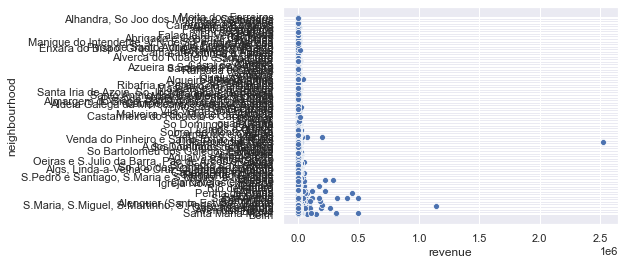

In [127]:
sns.scatterplot(x='revenue', y='neighbourhood', data=listings_prev_yr)

In [122]:
rev_host = listings_prev_yr.groupby(['id', 'host_id', 'host_name', 'neighbourhood'])['revenue'].sum().sort_values(ascending=False)
abv_avg = rev_host.loc[rev_host>=rev_host.mean()]
abv_avg
# rev_host.mean().round(2)

id        host_id    host_name           neighbourhood                                    
14509516  41324221   Joao                Parque das Naes                                      2518560.00
3587938   18077054   Martim              Cascais e Estoril                                    1142400.00
30497187  126318499  Alvercinio          Santa Maria Maior                                     499200.00
5543013   6930224    Ana & Vitor         Santo Antnio                                          495159.00
22732800  167809533  Grandlis            Penha de Frana                                        444960.00
                                                                                                 ...    
17237652  6392918    Typical Apartments  So Vicente                                              3991.68
10083184  51739126   David               Misericrdia                                             3990.96
25274384  49198147   Marta               Cascais e Estoril           

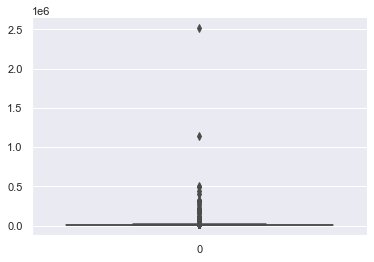

In [126]:
sns.boxplot(data=abv_avg)
sns.despine()
sns.set(context='notebook')

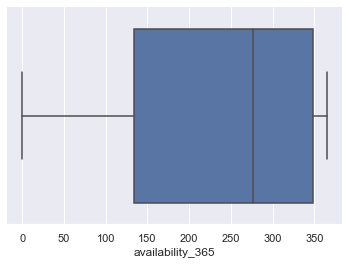

In [89]:
sns.boxplot(x='availability_365',y=None,data=listings_prev_yr)
sns.despine(left=True)
sns.set(style='dark')

# below has outlier

In [68]:
listings_two[prev_yr]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,26,2020-01-03,0.37,1,340
1,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,113,2019-12-08,1.52,1,321
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,1,321,2020-03-11,2.80,1,350
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71239,-9.12887,Entire home/apt,60,2,239,2020-03-15,2.45,2,296
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71195,-9.15877,Entire home/apt,1100,2,55,2020-03-15,0.48,2,322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24169,43355588,Quarto com Cama King Size,134533163,André,Lisboa,Beato,38.73448,-9.11330,Private room,25,1,1,2020-05-20,1.00,2,270
24200,43408245,CB LISBOA - SUNNY AND ELEGANT APARTMENT - LAPA V,318343650,Casa Boma,Lisboa,Estrela,38.71005,-9.15838,Entire home/apt,119,1,1,2020-05-25,1.00,9,309
24203,43409525,Sintra - Escape to Nature 1,7555035,Ana,Sintra,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",38.80154,-9.39237,Private room,50,1,1,2020-05-24,1.00,5,340
24205,43410578,Sintra - Escape to Nature 5,7555035,Ana,Sintra,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",38.80035,-9.39256,Private room,50,1,2,2020-05-21,2.00,5,301


# price / neighbourhood / room_type

In [33]:
listings_two[mask].groupby(['neighbourhood', 'room_type']).agg(np.sum)['minimum_nights'].sort_values(ascending=False)


neighbourhood                             room_type      
Santa Maria Maior                         Entire home/apt    7122
Misericrdia                               Entire home/apt    4992
Cascais e Estoril                         Entire home/apt    3813
Arroios                                   Entire home/apt    3051
Santo Antnio                              Entire home/apt    2923
                                                             ... 
Sapataria                                 Private room          1
Pvoa de Santo Adrio e Olival de Basto     Shared room           1
Camarate, Unhos e Apelao                  Private room          1
Alhandra, So Joo dos Montes e Calhandriz  Entire home/apt       1
So Joo das Lampas e Terrugem              Private room          1
Name: minimum_nights, Length: 272, dtype: int64

In [34]:
# type(neigh_rm_type)

In [35]:
# sns.barplot(x='neighbourhood',y='room_type',data=neigh_rm_type)

# copy to other masks

In [36]:
# listings_two[mask].groupby(['neighbourhood', 'room_type']).agg(np.median)['price'].round(2).sort_values(ascending=False)
neigh_rm_type = listings_two[mask].groupby(['neighbourhood', 'room_type'])[['price']].min().reset_index()
neigh_rm_type

,neighbourhood,room_type,price
0,A dos Cunhados e Maceira,Entire home/apt,35
1,A dos Cunhados e Maceira,Private room,30
2,A dos Cunhados e Maceira,Shared room,21
3,Abrigada e Cabanas de Torres,Entire home/apt,50
4,Agualva e Mira-Sintra,Entire home/apt,40
...,...,...,...
267,Vilar,Entire home/apt,55
268,Vilar,Private room,75
269,Vimeiro,Entire home/apt,39
270,guas Livres,Entire home/apt,11


In [37]:
rm_type_price_min = listings_two[mask].groupby(['room_type'])[['price']].min().reset_index()
rm_type_price_max = listings_two[mask].groupby(['room_type'])[['price']].max().reset_index()
rm_type_price_mean = listings_two[mask].groupby(['room_type'])[['price']].mean().round(2).reset_index()
rm_type_price_med = listings_two[mask].groupby(['room_type'])[['price']].median().reset_index()
rm_type_price
rm_type_price_max

NameError: name 'rm_type_price' is not defined

In [ ]:
rm_type_median = sns.barplot(x='room_type',y='price',data=rm_type_price_med)
rm_type_median.set(xlabel=None, ylabel='Price', title='Median Price')
sns.despine()

In [ ]:
rm_type_min = sns.barplot(x='room_type',y='price',data=rm_type_price_min)
rm_type_min.set(xlabel=None, ylabel='Price', title='Min Price')
sns.despine()

In [ ]:
rm_type_max = sns.barplot(x='room_type',y='price',data=rm_type_price_max)
rm_type_max.set(xlabel=None, ylabel='Price', title='Max Price')
sns.despine()

In [ ]:
neigh_price_min = listings_two[mask].groupby(['neighbourhood'])[['price']].min().sort_values(by='price',ascending=False).reset_index()
neigh_price_max = listings_two[mask].groupby(['neighbourhood'])[['price']].max().reset_index()
neigh_price_mean = listings_two[mask].groupby(['neighbourhood'])[['price']].mean().round(2).reset_index()
neigh_price_med = listings_two[mask].groupby(['neighbourhood'])[['price']].median().reset_index()

neigh_price_min.drop(neigh_price_min.index[6:], inplace=True)
neigh_price_max.drop(neigh_price_max.index[6:], inplace=True)
neigh_price_med.drop(neigh_price_med.index[6:], inplace=True)
neigh_price_min

In [ ]:
neigh_price_min_plot = sns.barplot(x='price',y='neighbourhood',data=neigh_price_min)
neigh_price_min_plot.set(xlabel='Price', ylabel='Neighbourhood', title='Min Price')
sns.despine()

In [ ]:
neigh_price_max_plot = sns.barplot(x='price',y='neighbourhood',data=neigh_price_max)
neigh_price_max_plot.set(xlabel='Price', ylabel='Neighbourhood', title='Max Price')
sns.despine()

In [ ]:
neigh_price_med_plot = sns.barplot(x='price',y='neighbourhood',data=neigh_price_med)
neigh_price_med_plot.set(xlabel='Price', ylabel='Neighbourhood', title='Median Price')
sns.despine()

In [ ]:
type(neigh_rm_type)

In [ ]:
sns.barplot(x='',y='',data=neigh_rm_type)

In [ ]:
type(mask)

In [ ]:
neigh_revs = listings_two[mask].groupby(['neighbourhood'])[['number_of_reviews']].sum().sort_values(by='number_of_reviews',ascending=False).reset_index()
neigh_revs.drop(neigh_revs.index[6:], inplace=True)
neigh_revs

In [ ]:
neigh_rev_plot = sns.barplot(x='number_of_reviews', y='neighbourhood', data=neigh_revs)
neigh_rev_plot.set(xlabel='Number of Reviews', ylabel='Neighbourhood', title='Most Activity')
sns.despine()

In [ ]:
calendar.info()

In [ ]:
listings_two.info()

In [ ]:
# lis_cal = calendar.merge(listings_two, on='id')
lis_cal = pd.merge(listings_two, calendar, how='left', left_on='id', right_on='listing_id')
lis_cal.info()

In [ ]:
booked = lis_cal.groupby(['available']).count()[['listing_id']].reset_index()
booked

In [ ]:
ax = booked.set_index('available').T.plot(kind='bar', stacked=True, title='Reserved through 2021')
ax.set(xlabel='Availability', ylabel='Listings')

sns.despine()

In [ ]:
ax_two = sns.barplot(x='available', y='listing_id', data=booked)
ax_two.set(xlabel='Availability', ylabel='Listings', title='Reserved through 2021')
sns.despine()

# places where booked

In [ ]:
neigh_f = lis_cal.groupby(['available', 'neighbourhood']).count()[['listing_id']].sort_values(by='listing_id', ascending=False).reset_index()
neigh_booked = neigh_f.loc[neigh_f['available']=='f'].reset_index()
neigh_booked.drop(['index'], axis=1, inplace=True)
neigh_booked.drop(neigh_booked.index[7:], inplace=True)
neigh_booked

In [ ]:
neigh_booked_plot = sns.barplot(x='listing_id', y='neighbourhood', data=neigh_booked)
neigh_booked_plot.set(xlabel='Count of listings', ylabel='Neighbourhood', title='Most Bookings')
sns.despine()

In [ ]:
mask2 = (listings_two['last_review'] > '2018-6-5') & (listings_two['last_review'] <= '2019-6-5')
listings_two[mask2]

In [ ]:
mask3 = (listings_two['last_review'] > '2017-6-5') & (listings_two['last_review'] <= '2018-6-5')
listings_two[mask3]

In [ ]:
mask4 = (listings_two['last_review'] > '2016-6-5') & (listings_two['last_review'] <= '2017-6-5')
listings_two[mask4]

In [ ]:
mask5 = (listings_two['last_review'] > '2015-6-5') & (listings_two['last_review'] <= '2016-6-5')
listings_two[mask5].info()

In [ ]:
mask6 = (listings_two['last_review'] > '2014-6-5') & (listings_two['last_review'] <= '2015-6-5')
listings_two[mask6].info()

In [ ]:
mask7 = (listings_two['last_review'] > '2013-6-5') & (listings_two['last_review'] <= '2014-6-5')
listings_two[mask7].info()

In [ ]:
mask8 = (listings_two['last_review'] > '2012-6-5') & (listings_two['last_review'] <= '2013-6-5')
listings_two[mask8].info()

In [ ]:
mask9 = (listings_two['last_review'] > '2011-6-5') & (listings_two['last_review'] <= '2012-6-5')
listings_two[mask9].info()

## create a years list and counts list and add to axes of a plot 

In [ ]:
# plot sum'listing_id' by last_review

In [ ]:
yr_reviews = listings_two.groupby(['last_review']).count()[['number_of_reviews']].reset_index()
yr_reviews.tail(50)
yr_reviews.info()

In [ ]:
# Groupby months

In [ ]:
# listings_two.last_review.groupby(pd.Grouper(freq='M'))
listings_two.index = pd.to_datetime(listings_two['last_review'],format='%m/%d/%y %I:%M%p')
yr_months = listings_two.groupby(by=[listings_two.index.month, listings_two.index.year])
yr_months.count()

In [ ]:
# listings_two['YearMonth'] = pd.to_datetime(listings_two['last_review']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

yr_mn = listings_two.groupby(pd.Grouper(freq='M'))

res = yr_mn['number_of_reviews'].count().reset_index()
res.drop(res.index[0:66], inplace=True)
res = res.reset_index()
res.drop(columns='index', inplace=True)
res

In [ ]:
type(res)

# plot above

In [ ]:
by_year = sns.lineplot(x='last_review', y='number_of_reviews', data=res)
by_year.set(xlabel='Year-Month', ylabel='Number of Reviews', title='2017 - 2020')
sns.despine()

In [ ]:
res_two = yr_mn['number_of_reviews'].count().reset_index()
res_two.drop(res_two.index[0:101], inplace=True)
res_two = res_two.reset_index()
res_two.drop(columns='index', inplace=True)
res_two

In [ ]:
type(res_two)

In [ ]:
quar = sns.lineplot(x='last_review', y='number_of_reviews', data=res_two)
quar.set(xlabel='Year-Month', ylabel='Number of Reviews', title='2020 Activity')
sns.despine()

# how do I get the min and max price for entire home/apt?

In [ ]:
# listings_two[mask].groupby(['room_type']).agg(np.mean)['price'].round(2)
# listings_two[mask].groupby(['room_type']).min
# listings_two[mask]['price'].mean().round(2)
ent_home_apt = listings_two.loc[listings_two['room_type']=='Entire home/apt']
# ent_home_apt
ent_home_apt['price'].median().round(2)
ent_home_apt['price'].min().round(2)
ent_home_apt['price'].max().round(2)

# can't drop outlier ?

In [ ]:
home_apt_lisboa = listings_two[mask].loc[listings_two[mask]['neighbourhood_group']=='Lisboa']

# outlier = home_apt_lisboa.loc[home_apt_lisboa['price']==8000]
home_apt_lisboa

In [ ]:
home_apt_lisboa = listings_two[mask].loc[listings_two[mask]['neighbourhood_group']=='Lisboa']

# home_apt_lisboa.loc(home_apt_lisboa['price']=='8000')

In [ ]:
box_lisboa = sns.boxplot(x=home_apt_lisboa['price'])
box_lisboa.set(xlabel='Price', ylabel=None)
sns.set(context='notebook',style='darkgrid')
sns.despine(left=True)

# number of reviews per neighbourhood
- use sum or count? * minimum nights * price

In [ ]:
listings_two[mask].groupby(['neighbourhood']).agg(np.sum)['number_of_reviews'].sort_values(ascending=False)
# listings_two[mask].groupby(['neighbourhood']).agg(np.sum)['number_of_reviews'].sort_values(ascending=False)

In [ ]:
listings_two.info()

In [ ]:
listings_two.groupby(['neighbourhood']).agg(np.sum).describe()

In [ ]:
calendar.describe()

In [ ]:
calendar.groupby('listing_id').mean()

In [ ]:
listings_two.columns.values

In [ ]:
listings_two.loc[listings_two['availability_365']>180].count()

In [ ]:
listings_two[['host_id', 'calculated_host_listings_count']]

In [ ]:
listings_two.groupby(['host_id']).agg(np.mean)

## Calculate total income